In [1]:
#  Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
#  Step 2: Ensure Output Directory Exists
os.makedirs("../output", exist_ok=True)


In [3]:
#  Step 3: Load Dataset
df = pd.read_csv("../Data/Iris.csv")
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
#  Step 4: Preprocessing
# Drop ID column
df.drop("Id", axis=1, inplace=True)

# Separate features and target
X = df.drop("Species", axis=1)
y = df["Species"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [5]:
#  Step 5: Train and Evaluate KNN with Different K
k_values = list(range(1, 16))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k} → Accuracy = {acc:.4f}")


K = 1 → Accuracy = 0.9667
K = 2 → Accuracy = 1.0000
K = 3 → Accuracy = 1.0000
K = 4 → Accuracy = 1.0000
K = 5 → Accuracy = 1.0000
K = 6 → Accuracy = 1.0000
K = 7 → Accuracy = 1.0000
K = 8 → Accuracy = 1.0000
K = 9 → Accuracy = 1.0000
K = 10 → Accuracy = 1.0000
K = 11 → Accuracy = 1.0000
K = 12 → Accuracy = 1.0000
K = 13 → Accuracy = 1.0000
K = 14 → Accuracy = 1.0000
K = 15 → Accuracy = 1.0000


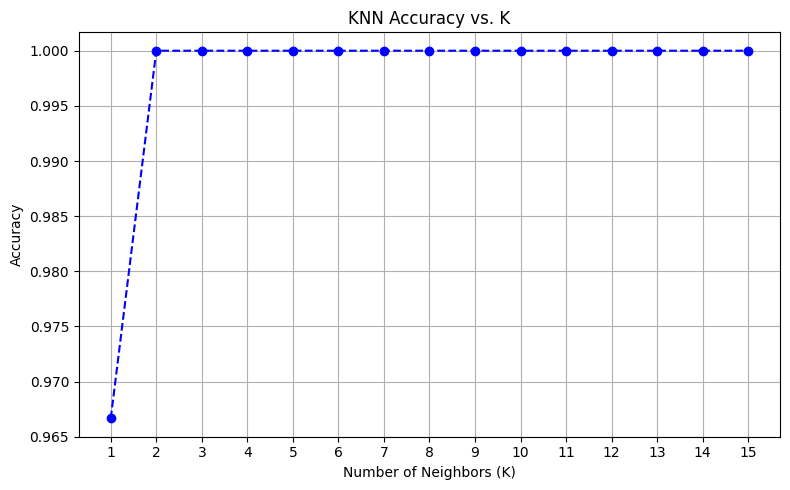

In [6]:
# 📈 Step 6: Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='blue')
plt.title("KNN Accuracy vs. K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig("../output/knn_accuracy_vs_k.png")
plt.show()


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



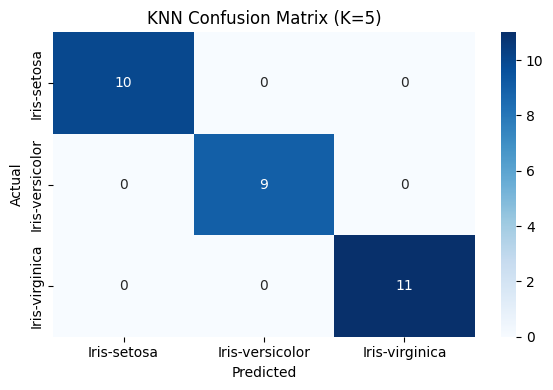

In [7]:
# Choose best K (based on previous results — or pick K=5 as a good balance)
best_k = 5

# Train final KNN model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title(f"KNN Confusion Matrix (K={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("../output/confusion_matrix.png")
plt.show()


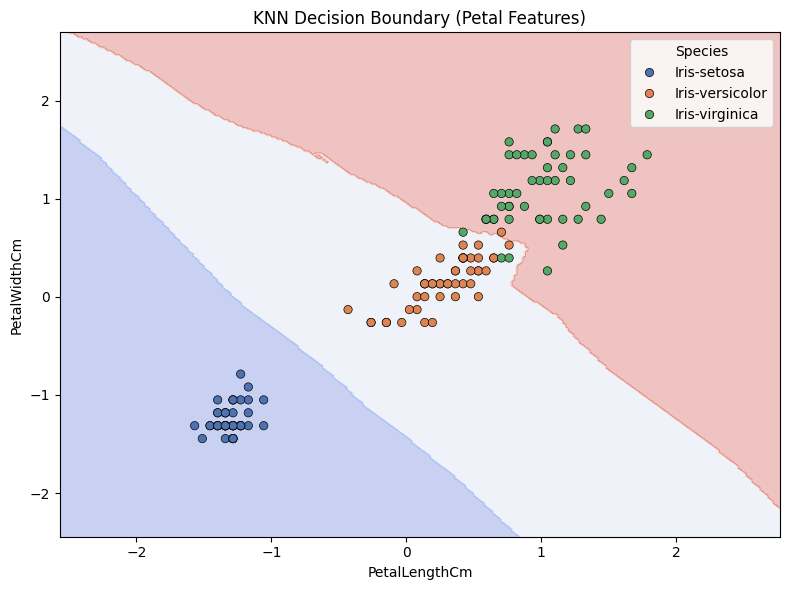

In [9]:
# Reload raw data to work with original feature names
df = pd.read_csv("../Data/Iris.csv")
df.drop("Id", axis=1, inplace=True)

# Select two features for 2D visualization
features = ['PetalLengthCm', 'PetalWidthCm']
X_vis = df[features]
y_vis = df['Species']

# Normalize
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Encode species labels to integers for visualization
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)


# Train KNN on 2D data
knn.fit(X_vis_scaled, y_vis_encoded)

# Predict on meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Predict on meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Use actual labels for scatter
sns.scatterplot(x=X_vis_scaled[:, 0], y=X_vis_scaled[:, 1], hue=y_vis, palette='deep', edgecolor='k')

plt.title("KNN Decision Boundary (Petal Features)")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.tight_layout()
plt.savefig("../output/decision_boundaries.png")
plt.show()

